In [245]:
import pandas as pd
import numpy as np
import re # Regular expression library
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

data = pd.read_csv('Hotel Reservations.csv')
df = pd.DataFrame(data)
df = df.drop(columns=['Booking_ID'])
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [6]:
print("The number of columns:",df.shape[0])
print("THe number of rows:",df.shape[1])

The number of columns: 36275
THe number of rows: 18


# EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [40]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [41]:
print("The number of missing value:" , df.isnull().values.sum())
print("Is there any missing value:" , df.isnull().values.any())

The number of missing value: 0
Is there any missing value: False


In [248]:

# Correcting the 'lower' lambda function
lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 

# Applying the functions to the DataFrame
# Applying lowercase to all string columns in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':  # typically string columns are of 'object' type
        df[col] = df[col].map(lower)
        

In [249]:
encoded_df = df.copy()


encoded_df['type_of_meal_plan'] = encoded_df['type_of_meal_plan'].replace({'not selected': 0, 'meal plan 1': 1, 'meal plan 2': 2, 'meal plan 3': 3})
encoded_df['room_type_reserved'] = encoded_df['room_type_reserved'].replace({'room type 1': 0, 'room type 2': 1, 'room type 3': 2, 'room type 4': 3,
                                                             'room type 5': 4, 'room type 6': 5, 'room type 7': 6})
encoded_df['market_segment_type'] = encoded_df['market_segment_type'].replace({'offline': 0, 'online': 1, 'corporate': 2, 'aviation': 3, 'complementary': 4})
encoded_df['booking_status'] = encoded_df['booking_status'].replace({'canceled': 0, 'not canceled': 1})


### Type of Meal Plan

    Not Selected = 0
    Meal Plan 1 = 1
    Meal Plan 2 = 2
    Meal Plan 3 = 3

### Room Type

    Room Type 1 = 0
    Room Type 2 = 1
    Room Type 3 = 2
    Room Type 4 = 3
    Room Type 5 = 4
    Room Type 6 = 5
    Room Type 7 = 6

### Market Segment

    offline = 0
    online = 1
    corporate = 2
    avitation = 3
    complementary = 4

### Booking Status 

    canceled = 0
    not canceled = 1

<Axes: >

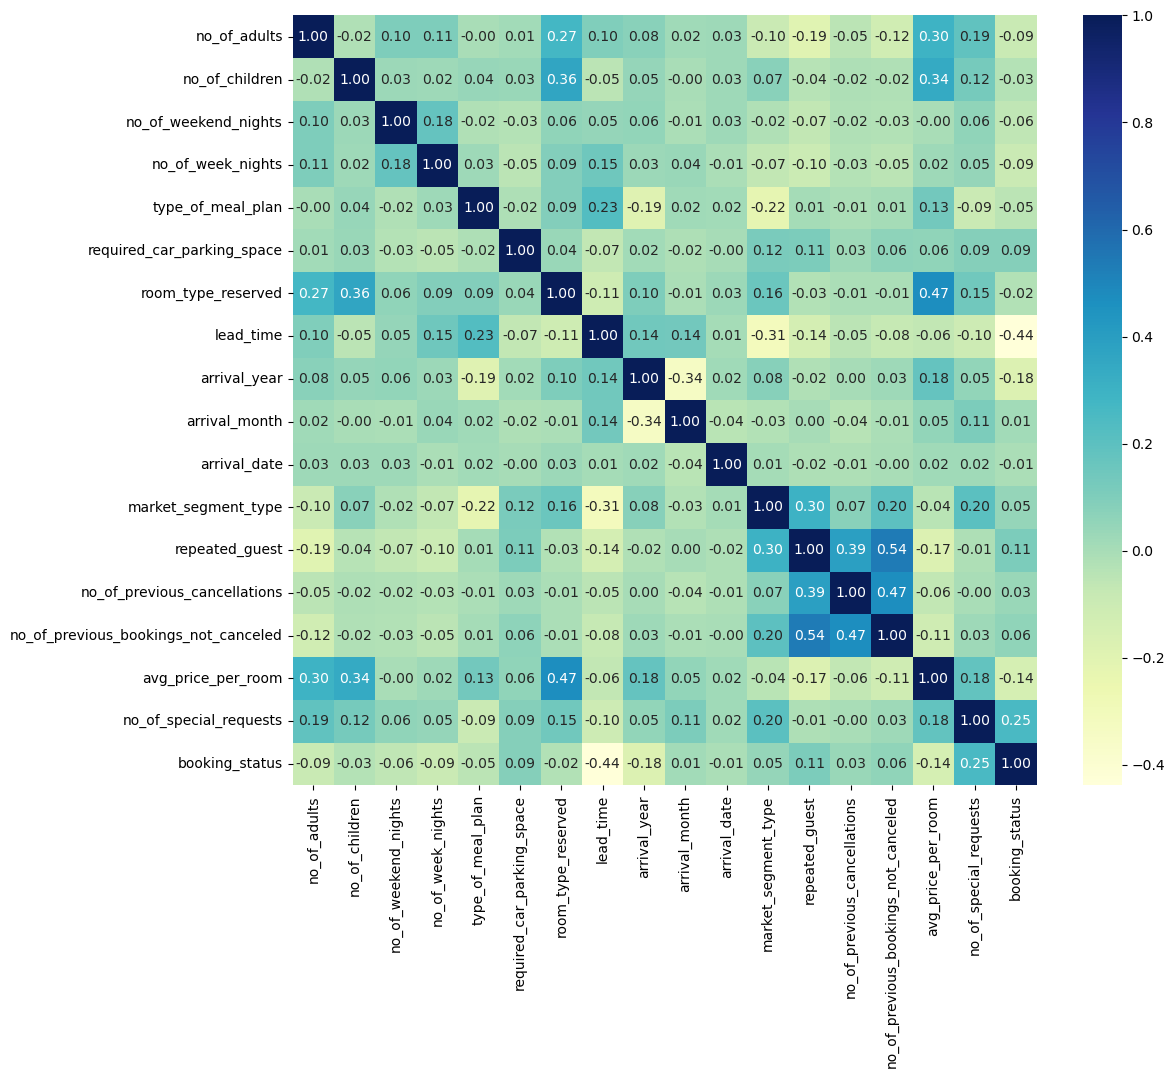

In [251]:
plt.figure(figsize=(12,10))
sns.heatmap(encoded_df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

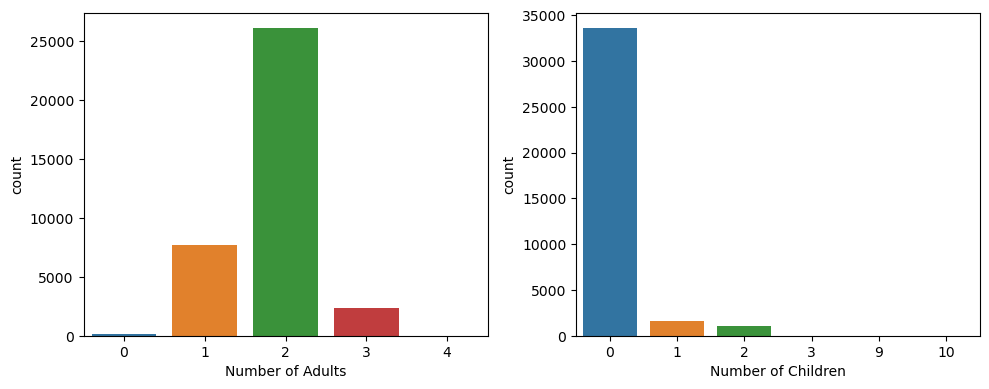

In [252]:
plt.figure(figsize = (10,15))


plt.subplot(4,2,1)
sns.countplot(data=df, x='no_of_adults' , hue='no_of_adults', palette='tab10', legend=False)
plt.xlabel('Number of Adults')

plt.subplot(4,2,2)
sns.countplot(data=df, x='no_of_children' , hue='no_of_children', palette='tab10', legend=False)
plt.xlabel('Number of Children')

plt.tight_layout()
plt.show()

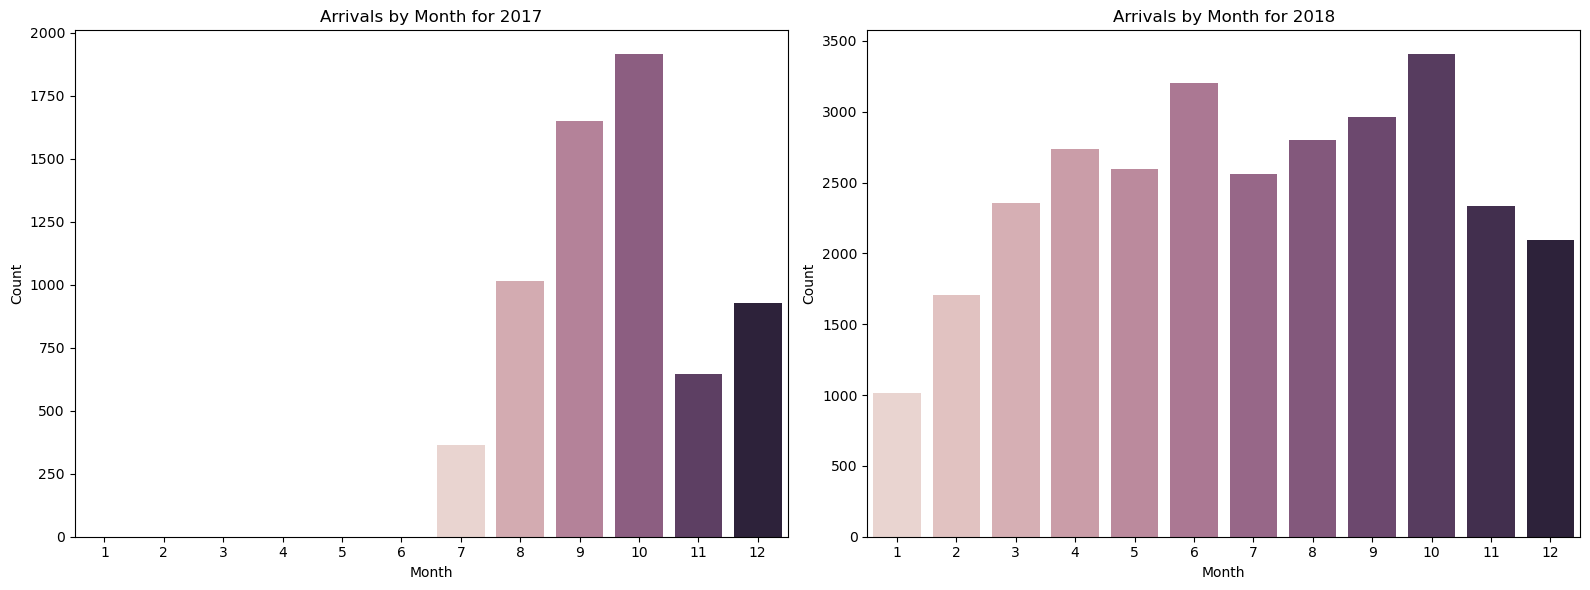

In [253]:
# Filter the DataFrame for the years 2017 and 2018
df_2017 = df[df['arrival_year'] == 2017]
df_2018 = df[df['arrival_year'] == 2018]

# Set up the plot
plt.figure(figsize=(16, 6))

month_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# Plot the count of arrivals by month
plt.subplot(1, 2, 1)
sns.countplot(data=df_2017, x='arrival_month', order=month_order, hue='arrival_month', legend=False)
plt.title('Arrivals by Month for 2017')
plt.xlabel('Month')
plt.ylabel('Count')

# Create subplot for 2018
plt.subplot(1, 2, 2)
sns.countplot(data=df_2018, x='arrival_month', hue = 'arrival_month', legend=False)
plt.title('Arrivals by Month for 2018')
plt.xlabel('Month')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

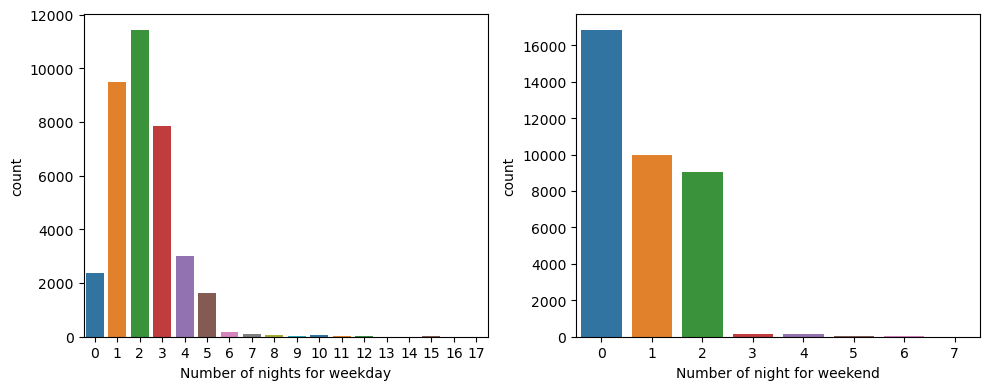

In [254]:
plt.figure(figsize = (10,15))


plt.subplot(4,2,1)
sns.countplot(data=df, x='no_of_week_nights' , hue='no_of_week_nights', palette='tab10', legend=False)
plt.xlabel('Number of nights for weekday')

plt.subplot(4,2,2)
sns.countplot(data=df, x='no_of_weekend_nights' , hue='no_of_weekend_nights', palette='tab10', legend=False)
plt.xlabel('Number of night for weekend')

plt.tight_layout()
plt.show()

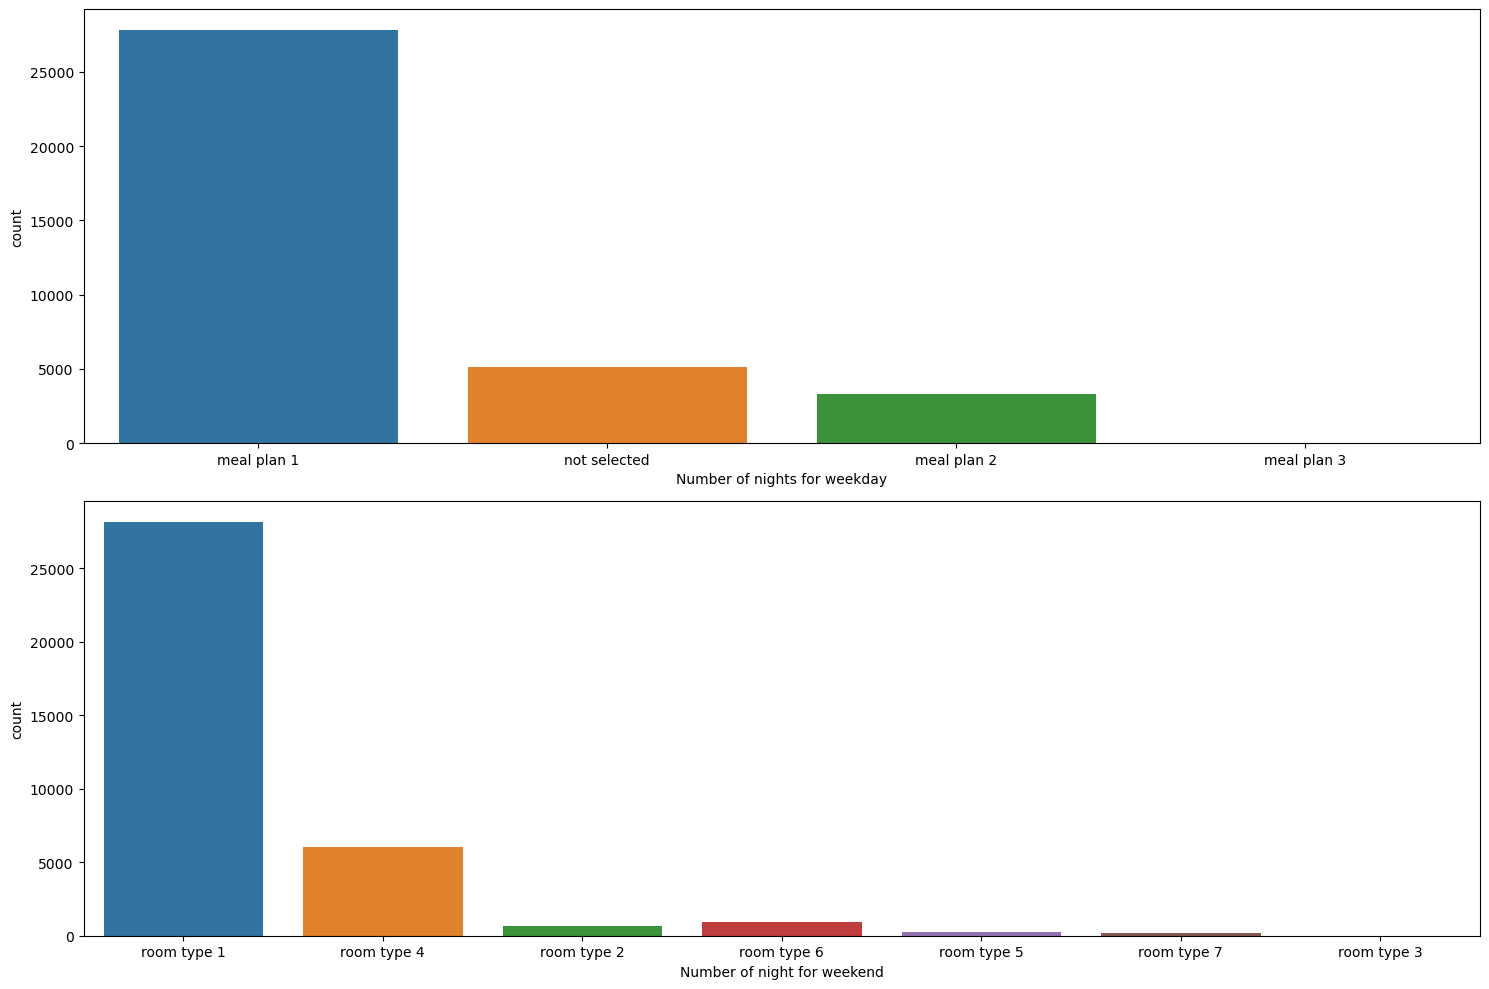

In [255]:
plt.figure(figsize = (15,10))

order_meal = ['Not Selected']

plt.subplot(2,1,1)
sns.countplot(data=df, x='type_of_meal_plan' , hue='type_of_meal_plan'  ,palette='tab10', legend=False)
plt.xlabel('Number of nights for weekday')

plt.subplot(2,1,2)
sns.countplot(data=df, x='room_type_reserved' , hue='room_type_reserved', palette='tab10', legend=False)
plt.xlabel('Number of night for weekend')

plt.tight_layout()
plt.show()

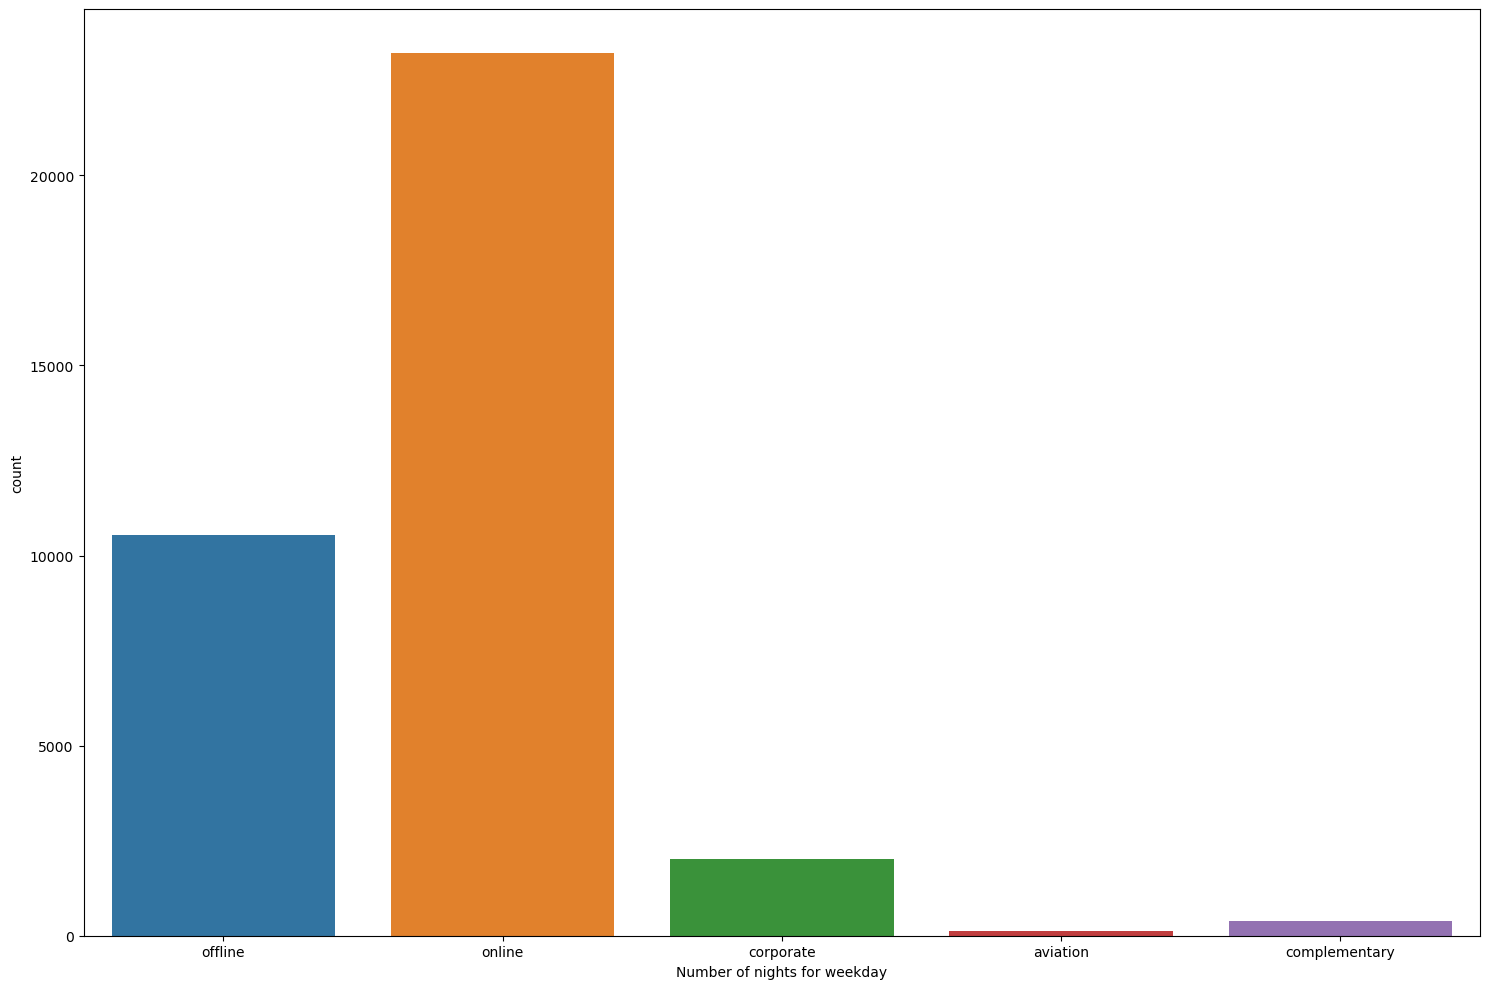

In [256]:
plt.figure(figsize = (15,10))

sns.countplot(data=df, x='market_segment_type' , hue='market_segment_type'  ,palette='tab10', legend=False)
plt.xlabel('Number of nights for weekday')

plt.tight_layout()
plt.show()

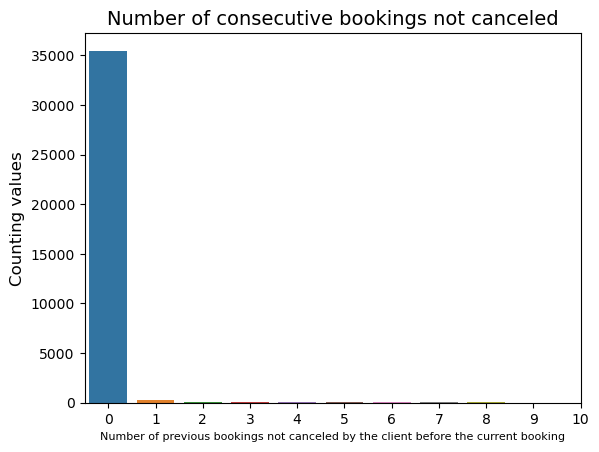

In [257]:
sns.countplot(x='no_of_previous_bookings_not_canceled', hue='no_of_previous_bookings_not_canceled', data=df, palette='tab10', legend=False)
plt.xlim(right=10) 

plt.xlabel('Number of previous bookings not canceled by the client before the current booking', fontsize=8)
plt.ylabel('Counting values', fontsize=12)
plt.title('Number of consecutive bookings not canceled', fontsize=14)

plt.show()

<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

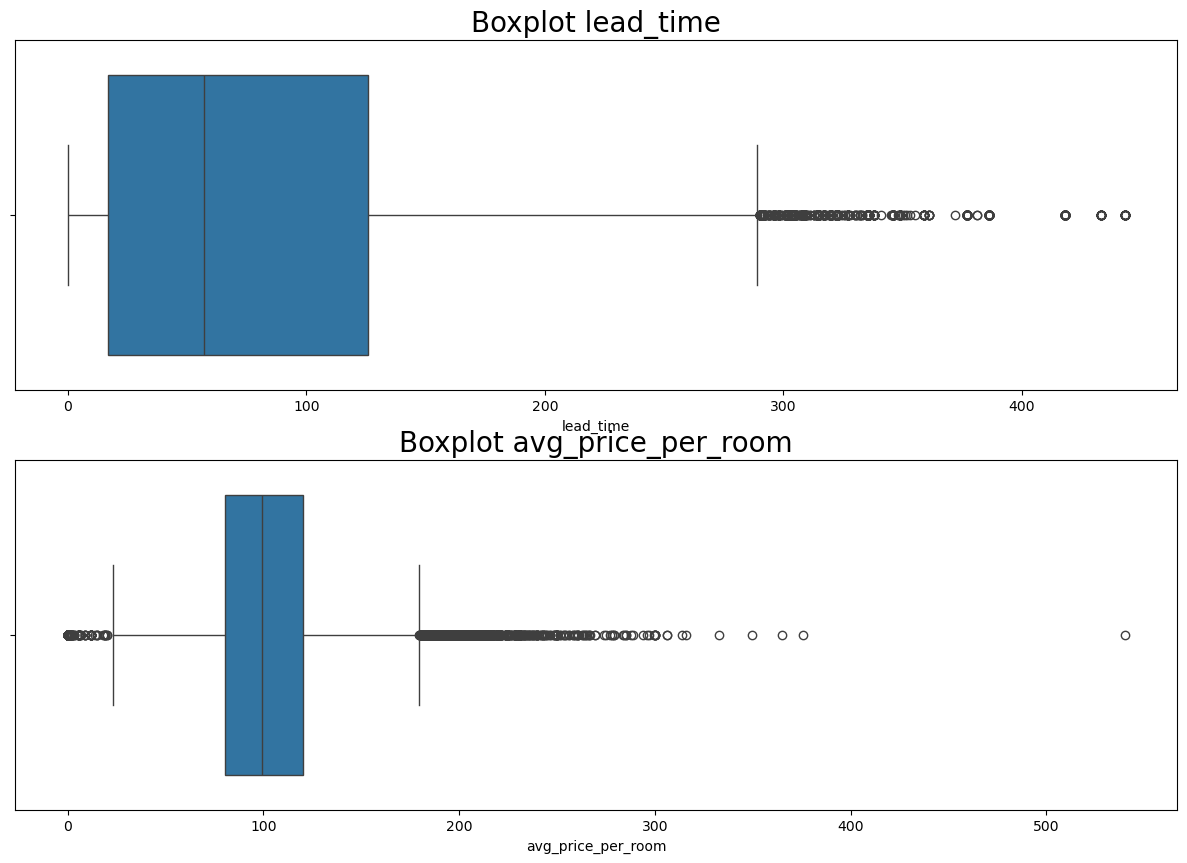

In [258]:
plt.figure(figsize = (15,10))

plt.subplot(2, 1, 1)
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

plt.subplot(2, 1, 2)
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])


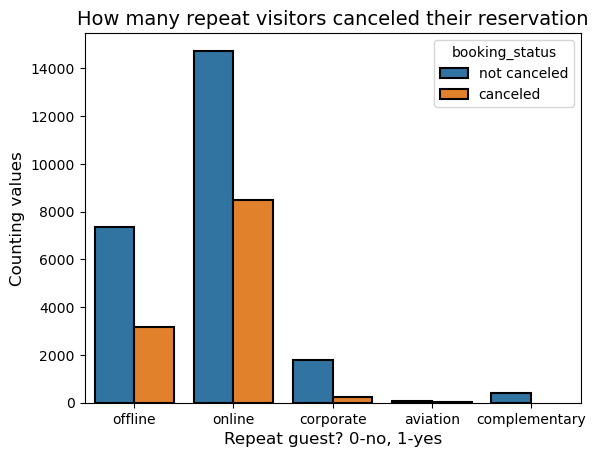

In [259]:
ax = sns.countplot(x="market_segment_type", hue="booking_status" , data=df,palette='tab10', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Repeat guest? 0-no, 1-yes', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('How many repeat visitors canceled their reservation', fontsize=14)


plt.show()

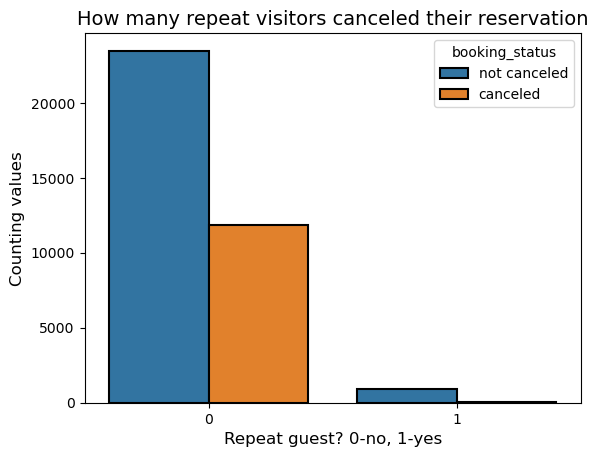

In [260]:
ax = sns.countplot(x="repeated_guest", hue="booking_status" , data=df ,palette='tab10', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Repeat guest? 0-no, 1-yes', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('How many repeat visitors canceled their reservation', fontsize=14)


plt.show()

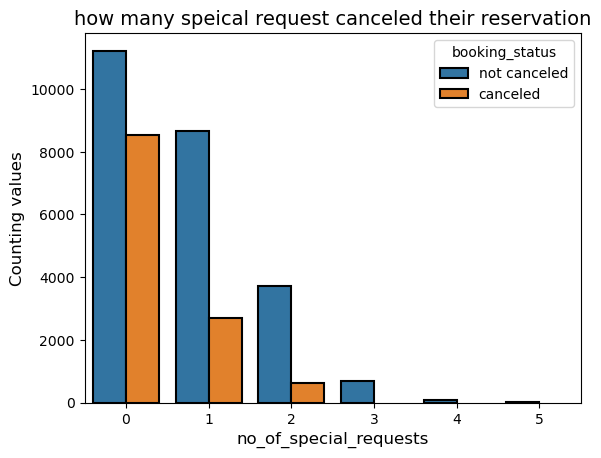

In [261]:
ax = sns.countplot(x="no_of_special_requests", hue="booking_status" , data=df ,palette='tab10', edgecolor='black', linewidth=1.5)

ax.set_xlabel('no_of_special_requests', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('how many speical request canceled their reservation', fontsize=14)


plt.show()

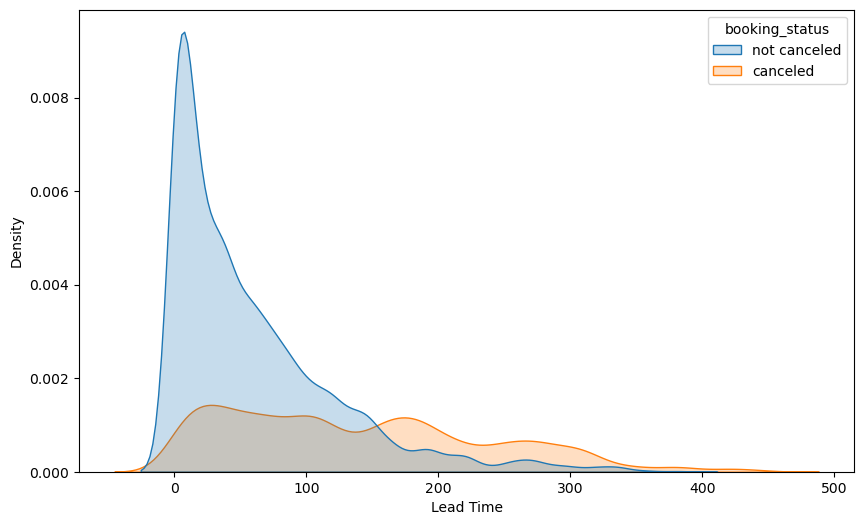

In [262]:
# Set up the plot
plt.figure(figsize=(10, 6))

sns.kdeplot(x='lead_time', hue='booking_status', palette = 'tab10', fill=True, data=df)

# Set the labels and title
plt.xlabel('Lead Time')


# Show the plot
plt.show()

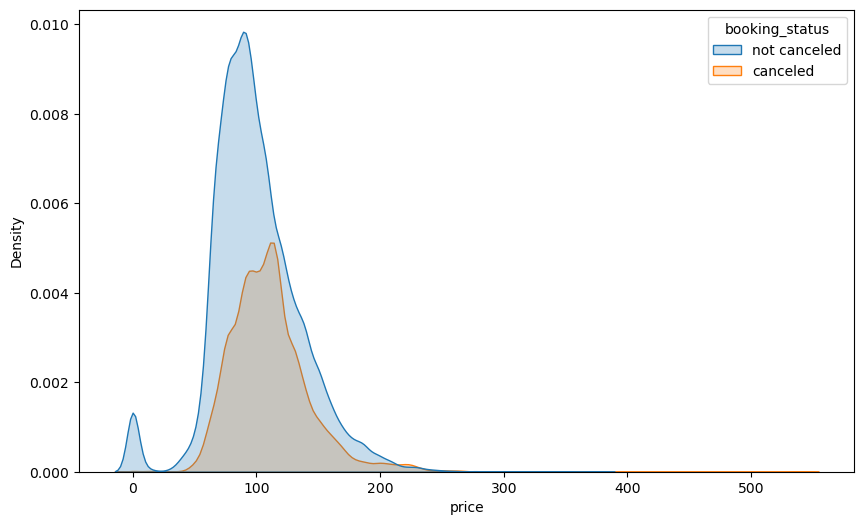

In [263]:
# Set up the plot
plt.figure(figsize=(10, 6))


sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'tab10', fill=True, data=df)

# Set the labels and title
plt.xlabel('price')


# Show the plot
plt.show()

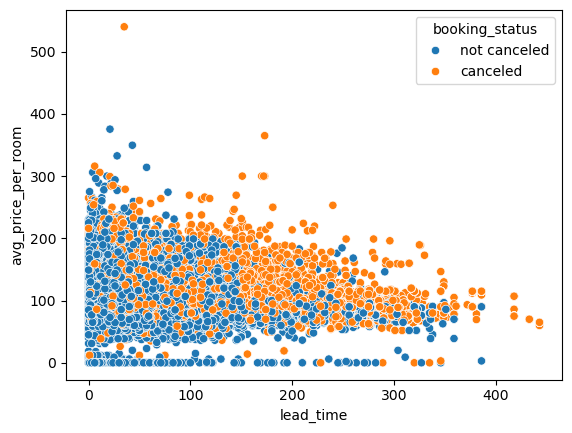

In [264]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'tab10', hue = 'booking_status')
plt.show()

# Split the data for train and test data

In [265]:
X = encoded_df[['no_of_adults', 'no_of_children','no_of_weekend_nights','no_of_week_nights', 'type_of_meal_plan', 	
               'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 	
               'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 	
               'avg_price_per_room', 'no_of_special_requests']]

y = encoded_df['booking_status']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: booking_status, dtype: int64

In [266]:


#Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (29020, 17)
Shape of X_test: (7255, 17)
Shape of y_train: (29020,)
Shape of y_test: (7255,)


# Fit your model and predict 

In [267]:


max_depth = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'max_depth': max_depth, 'criterion': alg}

model = DecisionTreeClassifier(random_state=42)
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11])})

In [268]:
print('Max Depth: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print("The training Score:", round(gridDecisionTree.score(X_train, y_train),3))
print("The test Score:", round(gridDecisionTree.score(X_test, y_test),3))

Max Depth:  11
Algorithm:  gini
The training Score: 0.895
The test Score: 0.876


In [269]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini', min_samples_split= 2, max_depth= 11,random_state=42)

# Train the model
dtc.fit(X_train, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv
y_pred = dtc.predict(X_test)



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Predicted Cancellation Status')

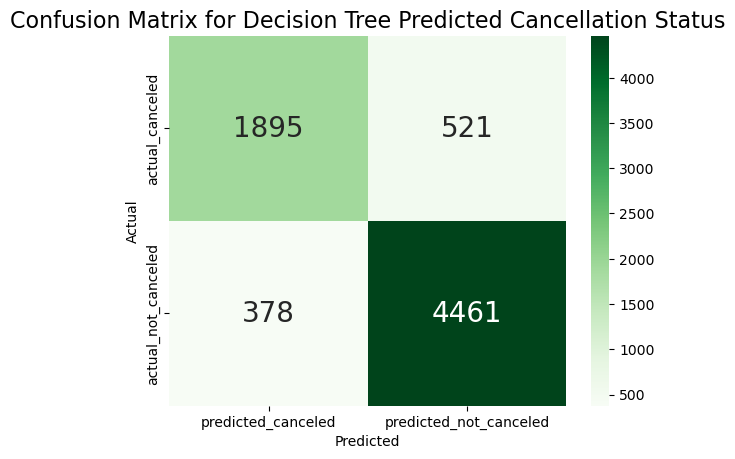

In [270]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm, xticklabels=['predicted_canceled', 'predicted_not_canceled'], yticklabels=['actual_canceled', 'actual_not_canceled'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="Greens");

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Decision Tree Predicted Cancellation Status", fontsize=16)



In [271]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#true_neg, false_pos = cm[0]
#false_neg, true_pos = cm[1]

#accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
#precision = round((true_pos) / (true_pos + false_pos),3)
#recall = round((true_pos) / (true_pos + false_neg),3)
#f1 = round(2 * (precision * recall) / (precision + recall),3)

accuracy = round(accuracy_score(y_test, y_pred),3)

precision_Canceled = round(precision_score(y_test, y_pred, pos_label = 0),3)
recall_Canceled = round(recall_score(y_test, y_pred, pos_label = 0),3)
f1_Canceled = round(f1_score(y_test, y_pred, pos_label = 0),3)

precision_not_Canceled = round(precision_score(y_test, y_pred, pos_label = 1),3)
recall_not_Canceled = round(recall_score(y_test, y_pred, pos_label = 1),3)
f1_not_Canceled = round(f1_score(y_test, y_pred, pos_label = 1),3)




print('Accuracy: {}'.format(accuracy))
print('Precision for canceled: {}'.format(precision_Canceled))
print('Recall for canceled: {}'.format(recall_Canceled))
print('F1 Score for canceled: {}'.format(f1_Canceled))

print('\nPrecision for not canceled: {}'.format(precision_not_Canceled))
print('Recall for not canceled: {}'.format(recall_not_Canceled))
print('F1 Score for not canceled: {}'.format(f1_not_Canceled))


print(classification_report(y_test, y_pred))

Accuracy: 0.876
Precision for canceled: 0.834
Recall for canceled: 0.784
F1 Score for canceled: 0.808

Precision for not canceled: 0.895
Recall for not canceled: 0.922
F1 Score for not canceled: 0.908
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2416
           1       0.90      0.92      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.86      0.85      0.86      7255
weighted avg       0.87      0.88      0.88      7255



In [272]:

# Example data and column names
data_test = [2,0,0,2,'meal plan 1',0,'Room_Type 1',157,2024,10,20,'Online',0,0,0,104.55,2]

columns = ["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights",
           "type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "lead_time",
           "arrival_year", "arrival_month", "arrival_date", "market_segment_type",
           "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled",
           "avg_price_per_room", "no_of_special_requests"]


lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) 



df_test = pd.DataFrame([data_test], columns=columns)


for col in df_test.columns:
    if df_test[col].dtype == 'object': 
        df_test[col] = df_test[col].map(lower)

df_test['type_of_meal_plan'] = df_test['type_of_meal_plan'].replace({'not selected': 0, 'meal plan 1': 1, 'meal plan 2': 2, 'meal plan 3': 3})
df_test['room_type_reserved'] = df_test['room_type_reserved'].replace({'room type 1': 0, 'room type 2': 1, 'room type 3': 2, 'room type 4': 3,
                                                             'room type 5': 4, 'room type 6': 5, 'room type 7': 6})
df_test['market_segment_type'] = df_test['market_segment_type'].replace({'offline': 0, 'online': 1, 'corporate': 2, 'aviation': 3, 'complementary': 4})


prediction = dtc.predict(df_test)

if(prediction == 0):
    str_prediction = 'Canceled'
elif(prediction == 1):
    str_prediction = 'Not Canceled'
print("Prediction result:", str_prediction)

Prediction result: Canceled
